# Brain Scan Classification
## Data 515 Winter 2021

In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt 
from IPython import display
import glob
import math

#import tensorflow as tf

In [2]:
# Read in single mha file from local filepath
#local_directory = 'C:/Users/afiala/Desktop/MSDS/515/Brain Scans/' # Shoot your own local directory here

#img = sitk.ReadImage('test/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193.mha')
img = sitk.ReadImage('brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193.mha')

In [3]:
# Change image into numpy array, check shape of tensor

img_arr = sitk.GetArrayFromImage(img)
img_arr.shape

(155, 240, 240)

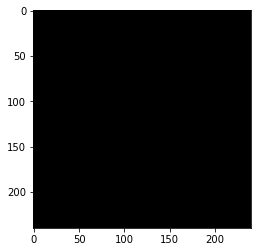

In [4]:
# View all 155 slices of image from top-down view

plt.set_cmap('gray')

for i in range(img_arr.shape[0]):
    plt.imshow(img_arr[i,:,:])
    plt.pause(.05)
    display.clear_output(wait=True)

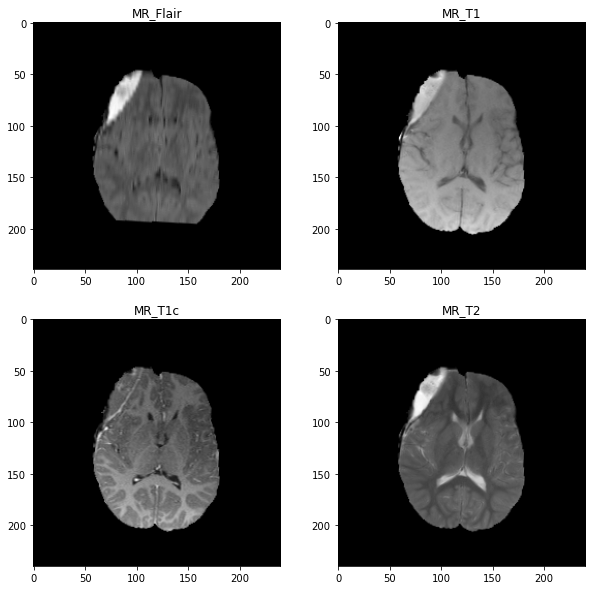

In [5]:
# Read in an entire folder's worth of mha files (4 in total), render them as images 

#paths_single_file = glob.glob(local_directory + 'test/HGG_LGG/brats_2013_pat0103_1/*')

paths_single_file = glob.glob('brats_2013_pat0103_1/*')

images = []
labels = []
for path in paths_single_file:
    img = sitk.ReadImage(path)
    labels.append(path.split('/')[-1].split('.')[-3])
    images.append(sitk.GetArrayFromImage(img))

fig, axes = plt.subplots(2, 2, figsize= [10, 10])

slice_index = int(155/2)

for index, ax in enumerate(axes.flat):
        ax.set_title(labels[index])
        ax.imshow(images[index][slice_index,:,:])


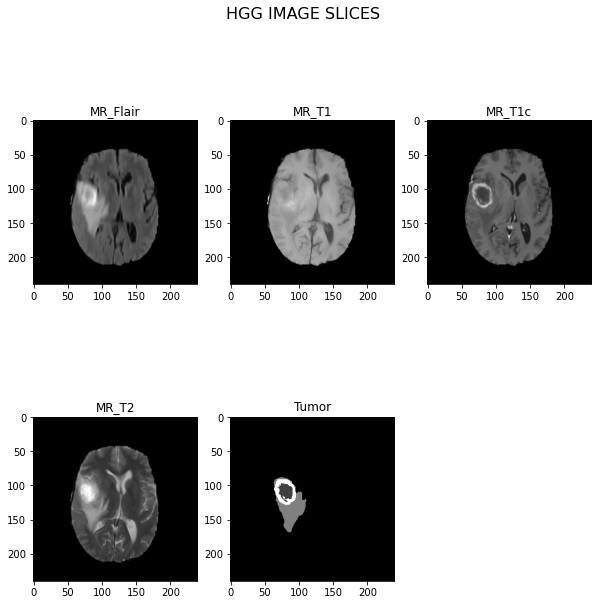

In [6]:
#paths_single_file = glob.glob(local_directory + 'train/HGG/brats_2013_pat0001_1/*')
paths_single_file = glob.glob('brats_2013_pat0001_1/*')

images = []
labels = []
for path in paths_single_file:
    img = sitk.ReadImage(path)
    label = path.split('/')[-1].split('.')[-3]
    if label == 'OT':
        label = 'Tumor'
    labels.append(label)
    images.append(sitk.GetArrayFromImage(img))

fig, axes = plt.subplots(2, 3, figsize= [10, 10])
fig.delaxes(axes[1,2])
fig.suptitle('HGG IMAGE SLICES', fontsize=16)

slice_index = int(155/2)

for index, ax in enumerate(axes.flat):
        if index == 5:
            break
        ax.set_title(labels[index])
        ax.imshow(images[index][slice_index,:,:])

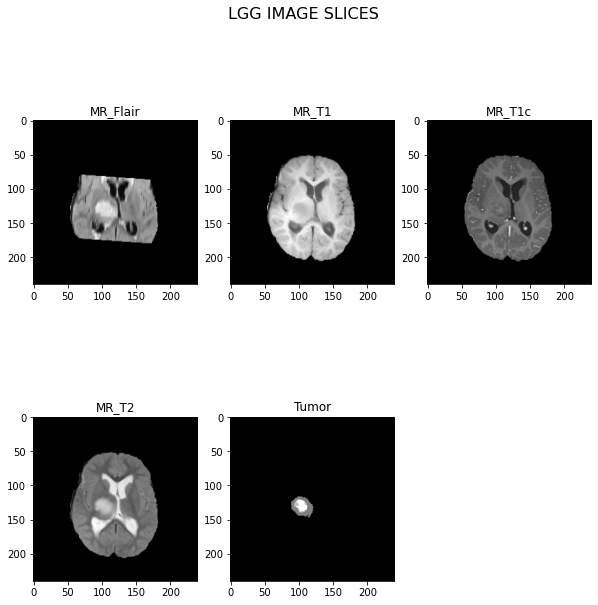

In [7]:
paths_single_file = glob.glob('train/LGG/brats_2013_pat0001_1/*')

images = []
labels = []
for path in paths_single_file:
    img = sitk.ReadImage(path)
    label = path.split('/')[-1].split('.')[-3]
    if label == 'OT':
        label = 'Tumor'
    labels.append(label)
    images.append(sitk.GetArrayFromImage(img))

fig, axes = plt.subplots(2, 3, figsize= [10, 10])
fig.delaxes(axes[1,2])
fig.suptitle('LGG IMAGE SLICES', fontsize=16)

slice_index = int(155/2)

for index, ax in enumerate(axes.flat):
        if index == 5:
            break
        ax.set_title(labels[index])
        ax.imshow(images[index][slice_index,:,:])